# Práctico 1: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar un sistema de recomendación basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

In [47]:
import pandas as pd
import numpy 
import seaborn
import matplotlib.pyplot as plt

In [48]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [49]:
artist_data = pd.read_csv("./data/lastfm/artists.dat", sep="\t")
artist_data.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [67]:
user_artist_plays = pd.read_csv("./data/lastfm/user_artists.dat", sep="\t")
user_artist_plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

In [ ]:
# Completar...

In [51]:
# Artista mas escuchado, 72 con un peso de 352698
max_listen = user_artist_plays[user_artist_plays['weight']==user_artist_plays['weight'].max()]
max_listen

,userID,artistID,weight
72739,1642,72,352698


In [52]:
# el artista 72 es Depeche Mode
artist = artist_data[artist_data['id']==72]
artist

,id,name,url,pictureURL
66,72,Depeche Mode,http://www.last.fm/music/Depeche+Mode,http://userserve-ak.last.fm/serve/252/75022.jpg


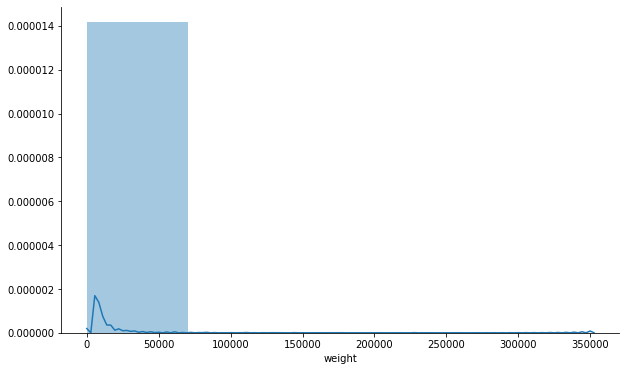

In [53]:
# Distribucion de los pesos con que se escuchan los artistas
plt.figure(figsize=(10,6))
seaborn.distplot(user_artist_plays['weight'].dropna(), bins=5)
seaborn.despine()

## Ejercicio 2 - Matriz de Usuario-Contenido

En este ejercicio, a partir del conjunto de datos, deberán generar una matriz de usuario-contenido. Tengan en cuenta que los ratings, en este caso, son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a cierto artista.

In [ ]:
# Completar...

In [54]:
uap = user_artist_plays.pivot(index='userID', columns='artistID', values='weight')
uap.head()

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
uap.sum()

artistID
1          771.0
2         8012.0
3          775.0
4          563.0
5          913.0
6         5080.0
7        96201.0
8        10791.0
9         9621.0
10        4067.0
11        1992.0
12        9564.0
13        2376.0
15        8963.0
16        1381.0
17        1780.0
18        3820.0
19        8685.0
20          60.0
21         110.0
22          58.0
23        1699.0
24         290.0
25       15166.0
26         558.0
27        5076.0
28        2109.0
30       38949.0
31        2134.0
32        9256.0
          ...   
18713      171.0
18714      163.0
18715      139.0
18716      133.0
18717      132.0
18718      132.0
18719      118.0
18720      112.0
18721      108.0
18722      107.0
18723       87.0
18724       84.0
18725      758.0
18726      337.0
18727      297.0
18728      281.0
18729      280.0
18730      263.0
18734     1032.0
18735      895.0
18736      879.0
18737      560.0
18738      408.0
18739      379.0
18740      320.0
18741      301.0
18742      294.0
18743

## Ejercicio 3 - Entrenamiento del algoritmo de recomendación

Utilizando las herramientas brindadas por Surpr!se, entrenen varios modelos de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo.

Si necesitan inspiración, les recomiendo revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).

In [ ]:
# Completar...

In [55]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(user_artist_plays[['userID', 'artistID', 'weight']], reader)

In [56]:
type(data)

surprise.dataset.DatasetAutoFolds

In [57]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [59]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [60]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
SlopeOne,3714.325693,6.079071,1.115752
KNNBaseline,3759.215327,0.629215,3.143857
KNNBasic,3762.282055,0.441456,2.539132
CoClustering,3775.993255,2.870106,0.203525
NMF,3780.429560,4.845873,0.212354
BaselineOnly,3787.614046,0.231393,0.281387
KNNWithZScore,3788.907952,0.544007,3.284033
SVD,3799.136675,3.534674,0.263458
SVDpp,3811.108048,29.348761,1.280165


In [61]:
# Algoritmo seleccionado para entrenamiento:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = SlopeOne() # usar el mejor algoritmo
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS


{'test_rmse': array([3093.79876588, 3013.89800577, 5019.08635166]),
 'fit_time': (4.357298851013184, 5.1605753898620605, 4.379148006439209),
 'test_time': (0.8671860694885254, 0.968045711517334, 0.8209033012390137)}

In [62]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = SlopeOne()
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 3700.7388


3700.7388364824387

## Ejercicio 4 - Sistema de recomendación

A partir del mejor modelo de recomendación que hayan sugerido en el caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares.

La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

In [64]:
# Completar...
type(user_artist_plays['artistID'])

pandas.core.series.Series

In [65]:
user_artist_plays['artistID']

0           51
1           52
2           53
3           54
4           55
         ...  
92829    18726
92830    18727
92831    18728
92832    18729
92833    18730
Name: artistID, Length: 92834, dtype: int64

In [84]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        artist_mapper: dict that maps user id's to artist indices
        user_inv_mapper: dict that maps user indices to user id's
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
    """
    M = df['artistID'].nunique()
    N = df['userID'].nunique()

    artist_mapper = dict(zip(numpy.unique(df['artistID']), list(range(M))))
    user_mapper = dict(zip(numpy.unique(df["userID"]), list(range(N))))
    
    artist_inv_mapper = dict(zip(list(range(M)), numpy.unique(df['artistID'])))
    user_inv_mapper = dict(zip(list(range(N)), numpy.unique(df["userID"])))
    
    artist_index = [artist_mapper[i] for i in df['artistID']]
    item_index = [user_mapper[i] for i in df['userID']]

    X = csr_matrix((df["weight"], (artist_index,item_index)), shape=(M,N))
    
    return X, artist_mapper, user_mapper, artist_inv_mapper, user_inv_mapper

X, artist_mapper, user_mapper, artist_inv_mapper, user_inv_mapper = create_X(user_artist_plays)

In [95]:
def find_similar_artists(artist_id, X, artist_mapper, artist_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        artist_id: id of the artist of interest
        X: user-artist utility matrix
        k: number of similar artist to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar artist ID's
    """
    X = X.T
    artists_ids = []
    
    artist_ind = artist_mapper[artist_id]
    artist_vec = X[artist_ind]
    if isinstance(artist_vec, (numpy.ndarray)):
        artist_vec = artist_vec.reshape(1,-1)
    
    # use k+1 since kNN output includes the artistID of interest
    kNN = NearestNeighbors(n_neighbors = k + 1, algorithm = 'brute', metric = metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(artist_vec, return_distance = False)
    
    for i in range(0, k):
        n = neighbour.item(i)
        artists_ids.append(artist_inv_mapper[n])
        
    artists_ids.pop(0)
    return artists_ids

In [69]:
X.shape[0]

17632

In [71]:
n_ratings_per_artist = X.getnnz(axis=0)

print(f"Most rated artist has {n_ratings_per_artist.max()} ratings.")
print(f"Least rated artist has {n_ratings_per_artist.min()} ratings.")

Most rated artist has 50 ratings.
Least rated artist has 1 ratings.


In [75]:
sum_ratings_per_artist = X.sum(axis=0)
mean_rating_per_artist = sum_ratings_per_artist/n_ratings_per_artist

In [76]:
X_mean_artist = numpy.tile(mean_rating_per_artist, (X.shape[0],1))

In [80]:
artist_mapper

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 15: 13,
 16: 14,
 17: 15,
 18: 16,
 19: 17,
 20: 18,
 21: 19,
 22: 20,
 23: 21,
 24: 22,
 25: 23,
 26: 24,
 27: 25,
 28: 26,
 30: 27,
 31: 28,
 32: 29,
 34: 30,
 36: 31,
 37: 32,
 38: 33,
 39: 34,
 40: 35,
 41: 36,
 43: 37,
 44: 38,
 45: 39,
 46: 40,
 47: 41,
 48: 42,
 49: 43,
 50: 44,
 51: 45,
 52: 46,
 53: 47,
 54: 48,
 55: 49,
 56: 50,
 57: 51,
 58: 52,
 59: 53,
 60: 54,
 61: 55,
 62: 56,
 63: 57,
 64: 58,
 65: 59,
 66: 60,
 67: 61,
 68: 62,
 69: 63,
 70: 64,
 71: 65,
 72: 66,
 73: 67,
 74: 68,
 75: 69,
 76: 70,
 77: 71,
 78: 72,
 79: 73,
 80: 74,
 81: 75,
 82: 76,
 83: 77,
 84: 78,
 85: 79,
 86: 80,
 87: 81,
 88: 82,
 89: 83,
 90: 84,
 91: 85,
 92: 86,
 93: 87,
 94: 88,
 95: 89,
 96: 90,
 97: 91,
 98: 92,
 99: 93,
 100: 94,
 101: 95,
 102: 96,
 103: 97,
 104: 98,
 105: 99,
 106: 100,
 107: 101,
 108: 102,
 109: 103,
 110: 104,
 111: 105,
 112: 106,
 113: 107,
 114: 108,
 115: 109,
 11

In [81]:
artist_inv_mapper

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 11,
 11: 12,
 12: 13,
 13: 15,
 14: 16,
 15: 17,
 16: 18,
 17: 19,
 18: 20,
 19: 21,
 20: 22,
 21: 23,
 22: 24,
 23: 25,
 24: 26,
 25: 27,
 26: 28,
 27: 30,
 28: 31,
 29: 32,
 30: 34,
 31: 36,
 32: 37,
 33: 38,
 34: 39,
 35: 40,
 36: 41,
 37: 43,
 38: 44,
 39: 45,
 40: 46,
 41: 47,
 42: 48,
 43: 49,
 44: 50,
 45: 51,
 46: 52,
 47: 53,
 48: 54,
 49: 55,
 50: 56,
 51: 57,
 52: 58,
 53: 59,
 54: 60,
 55: 61,
 56: 62,
 57: 63,
 58: 64,
 59: 65,
 60: 66,
 61: 67,
 62: 68,
 63: 69,
 64: 70,
 65: 71,
 66: 72,
 67: 73,
 68: 74,
 69: 75,
 70: 76,
 71: 77,
 72: 78,
 73: 79,
 74: 80,
 75: 81,
 76: 82,
 77: 83,
 78: 84,
 79: 85,
 80: 86,
 81: 87,
 82: 88,
 83: 89,
 84: 90,
 85: 91,
 86: 92,
 87: 93,
 88: 94,
 89: 95,
 90: 96,
 91: 97,
 92: 98,
 93: 99,
 94: 100,
 95: 101,
 96: 102,
 97: 103,
 98: 104,
 99: 105,
 100: 106,
 101: 107,
 102: 108,
 103: 109,
 104: 110,
 105: 111,
 106: 112,
 107: 113,
 108: 114,
 109: 115,
 11

In [89]:
artist_idx = dict(zip(artist_data['name'], list(artist_data.id)))
artist_idx

{'MALICE MIZER': 1,
 'Diary of Dreams': 2,
 'Carpathian Forest': 3,
 'Moi dix Mois': 4,
 'Bella Morte': 5,
 'Moonspell': 6,
 'Marilyn Manson': 7,
 'DIR EN GREY': 8,
 'Combichrist': 9,
 'Grendel': 10,
 'Agonoize': 11,
 'Behemoth': 12,
 'Hocico': 13,
 'Dimmu Borgir': 15,
 'London After Midnight': 16,
 'Psyclon Nine': 17,
 'The Crüxshadows': 18,
 ':wumpscut:': 19,
 'Limbonic Art': 20,
 'Artista sconosciuto': 21,
 'xotox': 22,
 'The Kovenant': 23,
 'Feindflug': 24,
 'Cradle of Filth': 25,
 'Tamtrum': 26,
 'Laibach': 27,
 'Gorgoroth': 28,
 'And One': 30,
 'Amduscia': 31,
 'Covenant': 32,
 'Icon of Coil': 34,
 'KMFDM': 36,
 'Funker Vogt': 37,
 'Dawn of Ashes': 38,
 'Sopor Aeternus & The Ensemble of Shadows': 39,
 'The Faint': 40,
 'God Module': 41,
 'Noisuf-X': 43,
 'Das Ich': 44,
 'Mindless Self Indulgence': 45,
 'Pyotr Ilyich Tchaikovsky': 46,
 'Emperor': 47,
 'Anorexia Nervosa': 48,
 'Reaper': 49,
 'Gothminister': 50,
 'Duran Duran': 51,
 'Morcheeba': 52,
 'Air': 53,
 'Hooverphonic': 54,


In [85]:
artists_names = dict(zip(artist_data['name'], artist_data['id']))
artists_names

{'MALICE MIZER': 1,
 'Diary of Dreams': 2,
 'Carpathian Forest': 3,
 'Moi dix Mois': 4,
 'Bella Morte': 5,
 'Moonspell': 6,
 'Marilyn Manson': 7,
 'DIR EN GREY': 8,
 'Combichrist': 9,
 'Grendel': 10,
 'Agonoize': 11,
 'Behemoth': 12,
 'Hocico': 13,
 'Dimmu Borgir': 15,
 'London After Midnight': 16,
 'Psyclon Nine': 17,
 'The Crüxshadows': 18,
 ':wumpscut:': 19,
 'Limbonic Art': 20,
 'Artista sconosciuto': 21,
 'xotox': 22,
 'The Kovenant': 23,
 'Feindflug': 24,
 'Cradle of Filth': 25,
 'Tamtrum': 26,
 'Laibach': 27,
 'Gorgoroth': 28,
 'And One': 30,
 'Amduscia': 31,
 'Covenant': 32,
 'Icon of Coil': 34,
 'KMFDM': 36,
 'Funker Vogt': 37,
 'Dawn of Ashes': 38,
 'Sopor Aeternus & The Ensemble of Shadows': 39,
 'The Faint': 40,
 'God Module': 41,
 'Noisuf-X': 43,
 'Das Ich': 44,
 'Mindless Self Indulgence': 45,
 'Pyotr Ilyich Tchaikovsky': 46,
 'Emperor': 47,
 'Anorexia Nervosa': 48,
 'Reaper': 49,
 'Gothminister': 50,
 'Duran Duran': 51,
 'Morcheeba': 52,
 'Air': 53,
 'Hooverphonic': 54,


In [86]:
def artist_finder(artist):
    return artist_data[artist_data['name'].str.contains(artist)]['name'].tolist()

In [90]:
name = artist_finder('Agonoize')[0]
name

'Agonoize'

In [91]:
artist_idx['Agonoize']

11

In [96]:
from sklearn.neighbors import NearestNeighbors
#artists_names = dict(zip(artist_data['name'], artist_data['id']))
name = artist_finder('Agonoize')[0]
#artist_id = 72

idx = artist_idx[name]
similar_artists = find_similar_artists(idx, X, artist_mapper, artist_inv_mapper, metric='cosine', k=10)


print('Recomendaciones para {} ({}):'.format(name, idx))
print()
for i in similar_artists:
    print('-', list(artist_idx.keys())[list(artist_idx.values()).index(i)], '(' + str(i) + ')')

Recomendaciones para Agonoize (11):

- Sia (697)
- ABBA (1464)
- Keane (182)
- Reamonn (185)
- Wizards (933)
- From a Second Story Window (828)
- Skid Row (952)
- Just Jack (1497)
- Porno for Pyros (873)
